<a href="https://colab.research.google.com/github/pp2098/Credit-Card-Fraud-detection/blob/main/CreditCard_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#importing dependies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


Data collection & preprocessing

In [64]:
cc=pd.read_csv("creditcard.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [66]:
cc['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [67]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [68]:
#dataset info
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
cc['Class']=cc['Class'].fillna(1)
cc_mean=cc['Amount'].mean()
cc['Amount']=cc['Amount'].fillna(cc_mean)
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly unbalanced because one class is dominating so we cannot fead this data to our ML model.
1-fraud transcation
0-Normal transaction

In [71]:
#Seprating normal and fraud class
legit=cc[cc['Class']==0]
fraud=cc[cc['Class']==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [72]:
#statistical measure
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [73]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [74]:
#compare values for both of these transactions
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


fraud=87
legit=21791
Under sampling
Creating a new dataset which contains fraud and legit transaction in same datset

In [75]:
legit_sample=legit.sample(n=87)

In [76]:
#concatnating two dataframe
new_data=pd.concat([legit_sample,fraud],axis=0)
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [77]:
new_data['Class'].value_counts()

1    492
0     87
Name: Class, dtype: int64

In [78]:
#splitting dataset into text and label
X=new_data.drop(['Class'],axis=1)
Y=new_data['Class']

In [79]:
#splitting data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=45)
print("Train shape: ",X_train.shape,Y_train.shape)
print("Test shape: ",X_test.shape,Y_test.shape)

Train shape:  (405, 30) (405,)
Test shape:  (174, 30) (174,)


Model Building

In [80]:
lg=LogisticRegression(random_state=45)
lg.fit(X_train,Y_train)
lg_pred=lg.predict(X_test)
lg_pred_train=lg.predict(X_train)
print("Accuracy for train dataset: ",metrics.accuracy_score(lg_pred_train,Y_train))
print("Accuracy for test dataset: ",metrics.accuracy_score(lg_pred,Y_test))

Accuracy for train dataset:  0.9358024691358025
Accuracy for test dataset:  0.9425287356321839


In [81]:
print("Classification report: ")
print(metrics.classification_report(lg_pred,Y_test))

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.95      0.98      0.97       151

    accuracy                           0.94       174
   macro avg       0.90      0.84      0.86       174
weighted avg       0.94      0.94      0.94       174



[[ 16   7]
 [  3 148]]


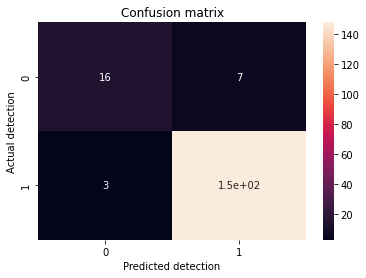

In [82]:
conf_lg=metrics.confusion_matrix(lg_pred,Y_test)
print(conf_lg)
sns.heatmap(conf_lg,annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predicted detection")
plt.ylabel("Actual detection")
plt.show()#1 for fraud and 0 for normal or legit
#TP=148,TN=18,FN=1,FP=7

AUC score:  0.9792869269949066


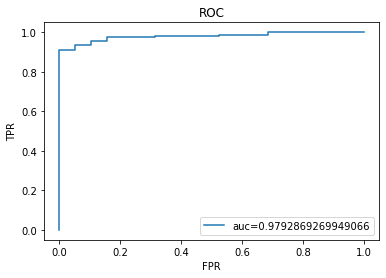

In [85]:
lg_pred_prob=lg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,lg_pred_prob)
auc=metrics.roc_auc_score(Y_test,lg_pred_prob)
print("AUC score: ",auc)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
#AUC curve shows that it is a good fit model

In [84]:
from sklearn.model_selection import cross_val_score
print("cross val score: ",cross_val_score(lg,X_train,Y_train,cv=10).mean())

cross val score:  0.9259146341463416
